# ARCH

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# List of Stocks and ETFs
Provided by Thomas Choi.

In [2]:
stock_list = pd.read_csv("stocks_and_etfs/stock_list.csv")
etf_list = pd.read_csv("stocks_and_etfs/etf_list.csv")

In [4]:
import random

# Choose a random stock
stock_symbol = random.choice(stock_list.iloc[:,0])
print(stock_symbol)

NVDA


## MySQL connection
Choosing one stock from SQL query to reduce query time.

In [5]:
# Environment variables
from dotenv import load_dotenv
load_dotenv("mysql.env")

import os
import sys
import mysql.connector

HOST=os.environ.get("HOST")
PORT=os.environ.get("PORT")
USER=os.environ.get("USER")
PASSWORD=os.environ.get("PASSWORD")

try: 
    conn = mysql.connector.connect(
        host=HOST,
        port=PORT,
        user=USER,
        password=PASSWORD,
        database="GlobalMarketData"
    )
    query = f"SELECT Date, Close, Open, High, Low, Volume from histdailyprice3 WHERE Symbol='{stock_symbol}';"
    histdailyprice3 = pd.read_sql(query, conn)
    conn.close()
except Exception as e:
    conn.close()
    print(str(e))

In [9]:
df = histdailyprice3.copy()

In [10]:
returns = 100 * df['Close'].pct_change().dropna()

In [11]:
from arch import arch_model
model = arch_model(returns, mean='Zero', vol='ARCH', p=1, o=0, q=0)

In [12]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -20292.4
Distribution:                  Normal   AIC:                           40588.9
Method:            Maximum Likelihood   BIC:                           40602.2
                                        No. Observations:                 5870
Date:                Wed, Dec 15 2021   Df Residuals:                     5870
Time:                        19:45:37   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         47.6877    157.306      0.303      0.762 

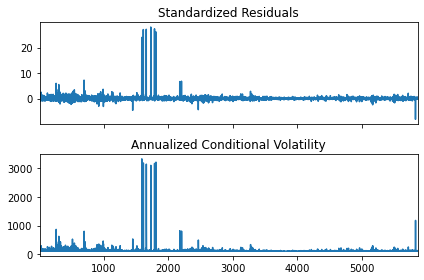

In [13]:
model_fitted.plot(annualize='D')

plt.tight_layout()
plt.show()